Un generador de numero aleatorios por metodo de congruencia lineal, es generador de numeros pseudosaleatorios, porque si sus parametros son costantes,
como en este caso, luego de N iteraciones la secuencia se repite, por lo cual determinar si es un buen generador depende de dos 
factores principales:
    1) El periodo, cuanto mas largo mejor.
    2) La predecibilidad del siguiente numero, si es muy facil predecirlo, no es util para problemas dedicados al azar.

In [1]:
def Generador(a=57, c=1, m=256, x0=10,n=1):
    Valores=[x0/m]
#     creo una lista para los xn, con el primer valor sea x0/m
    for i in range (n-1):
# el n-1 es para obtener los n resultados que pido en la iteracion ya que al agregarle el valor de x0 tendria en 
# cambio n+1 elemento en el conjuto de Valores
        x0 = (a*x0 + c) % m
# Las iteraciones de x0 las divido por m para que 0 < x0 < 1
        Valores.append(x0/m)
# Agrego el nuevo x0
    return Valores
# Que me devuelva la lista

In [2]:
Generador(n=10)
# un ejemplo con 10 iteraciones

[0.0390625,
 0.23046875,
 0.140625,
 0.01953125,
 0.1171875,
 0.68359375,
 0.96875,
 0.22265625,
 0.6953125,
 0.63671875]

Vemos el periodo

In [12]:
lista = Generador (n=300)
# elijo un n lo suficientemente grande para que se repita la secuencia

In [13]:
p = 0
# periodo de la lista
xi = 0
a = lista[0]
for i in lista:
    if i==0:
            xi = a
            print(a)
    else:
        if i != xi:
                p = p + 1
        else:
             print('El periodo es', p)
            
             break

0.0390625
El periodo es 255


Quiero graficar los puntos para ver correlaciones

In [14]:
lx = lista [:299]
# un lista que llamo lx que va del primer al ultimo, del x0 al xn
ly = lista [1:]
# una lista que empieza del x1 al xn

In [1]:
# Para graficar tengo que importar:
import matplotlib.pyplot as plt

Text(0, 0.5, 'ly')

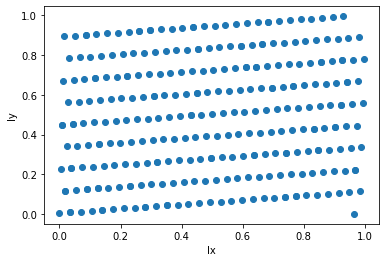

In [16]:
plt.scatter (lx, ly)
# el eje x son los lx, el eje y son los ly
plt.xlabel ('lx')
plt.ylabel ('ly')

Podemos ver una clara distribución de pendientes paralelas, esto se debe a cómo es construido el generador,
por sus parametros costantes, no se puede tomar para un trabajo serio como estadistica, tiene predecibilidad una vez sacada la 
pendiente

Evaluamos los momentos de orden k, para el estimador m(n, k) = sum (xn)**k/n
Con k= 1, 3, 7 para n = 10, 100, 1000 

In [3]:
l1 = Generador (n=10)
l2 = Generador (n=100)
l3 = Generador (n=1000)
# lista 1,2 y 3

In [8]:
# para poder calcular los momemntos debo importar numpy y asi hacer operaciones vectoriales
import numpy as np

In [7]:
def momento():
   # paso las listas a np
    l1array = np.array(l1)
    l2array = np.array(l2)
    l3array = np.array(l3)
    
    m1= np.sum(l1array**1)/10
#   como k=1 no afecta en la potencia
    m2= np.sum(l2array)/100
    m3 = np.sum(l3array)/1000
    
    m4 = np.sum(l1array**3)/10
    m5 = np.sum(l2array**3)/100
    m6 = np.sum(l3array**3)/1000
    
    m7 = np.sum(l1array**7)/10
    m8 = np.sum(l2array**7)/100
    m9 = np.sum(l3array**7)/1000
    print ('Los momentos para las listas son') 
    print ('k=1 para l1, l2, l3 respectivamente con N= 10, 100, 1000:', m1, m2, m3, )
    print( 'k=3 para l1, l2, l3 respectivamente con N=10, 100, 1000:', m4, m5, m6)
    print('k=7 para l1, l2, l3 respectivamente con N0 10, 100, 1000:', m7, m8, m9)
    
    return 

In [8]:
momento()

Los momentos para las listas son
k=1 para l1, l2, l3 respectivamente con N= 10, 100, 1000: 0.375390625 0.474921875 0.498234375
k=3 para l1, l2, l3 respectivamente con N=10, 100, 1000: 0.1850618064403534 0.23338165760040283 0.24849071073532106
k=7 para l1, l2, l3 respectivamente con N0 10, 100, 1000: 0.09915390894112788 0.11459061152846539 0.12350282955166753


Comparo con los valores de 1/(k+1) con k=1, 3, 7

In [9]:
r1 = 1 / (1 + 1)
r2 = 1 / (1 + 3)
r3 = 1 / (1 + 7)
print ('Los 1/ k+1 para k= 1, 3, 7 respectivamente son :', r1, r2, r3)

Los 1/ k+1 para k= 1, 3, 7 respectivamente son : 0.5 0.25 0.125


Vemos que para el momento() de la lista 3, los valores para k=1 con N=1000 se aproximan a 1/2 (o sea k=1), lo mismo respectivamente, 
los otros valores de momento () con k= 3, 7 se acercan a 1/4 y 1/8

Inciso b) 
Las caminatas son un punto que se mueve aleatoriamente en un cuadrado de lado 2*raiz(2), empezando
con centro en el origen donde sus lados en x, y van de -raiz(2) a +raiz(2), o de forma equivalente en un circulo
de radio 2 (el radio se saca con pitagoras) dentro del cuadrado, por los cual en una distribucion uniforme 
es menos probable que los puntos se desplacen hacia las esquinas o los bordes del cuadrado.
Si tengo una distribución uniforme X entre 0 y 1 (como la funcion random), entonces mi funcion de probabilidad
f(X) o Y con intervalo [a;b] tambien es uniforme y quiero que la suma de todas las probalidades sea 1 i.e. :

P(X) = (-infinito; infinito) f(X)dX = 1 (perdon mis habilidades de python son muy basicas para escribir
                                                integrales)

Para que f(X) en la integral nos de 1 en una distribución uniforme entonces f = 1 /(b-a) en el intervalo [a;b]
pues entonces la integral queda: f(X)*(b-a)=(1/(b-a)) * (b-a) = 1
En este caso de nuestra distribucion uniforme el intervalo es  [0;1] por la funcion X = random ==> 
f(X) = a +  X * (b-a) 
si X=0 ==> f(X=0) = a y X=1 ==> f(X=1)= b, nos queda dentro del intervalo, elijo a = -sqrt(2) y b = sqrt(2). 
Nos queda la funcion de salto f(X) = -sqrt(2) + X * (2*sqrt(2))

In [2]:
from random import random
import math

En el plano, debo definir dos funciones x e y uniformes:

In [3]:
def salto():
    x = -math.sqrt(2) + random()*(2*math.sqrt(2))
    y = -math.sqrt(2) + random()*(2*math.sqrt(2))
    return (x, y)

In [29]:
# Vemos un un ejemplo de como queda
salto()

(-0.16517139819025184, 0.4628263466368776)

In [4]:
def caminata(n=1000):
# n= 1000 pasos
    posicion_x = [0]
    posicion_y = [0]
# creo dos listas para las posiciones de x e y , empezando en el origen
    for i in range (n):
        salto_x, salto_y = salto()
        posicion_x.append(posicion_x[-1] + salto_x)
        posicion_y.append(posicion_y[-1] + salto_y)
    return (posicion_x, posicion_y)
# la nueva posicion de x es: de la ultima posicion de x (por eso el [-1]) ejecuto el salto_x, y se lo agrego
# a posicion_x con el append, lo mismo para el y

In [5]:
# Ahora vemos como hacer 10 caminatas, defino uno lista vacia:
listacam = []
for i in range(1, 11):
    ci = caminata()
    listacam.append(ci)
    

In [36]:
print (len(listacam[0]))
# el elemento 0 de listacam es la primera caminata, que esta a su vez posee dos elementos en su lista:
# La posicion x e la posicion y
print (len(listacam))
# Numero de caminatas en la lista

2
10


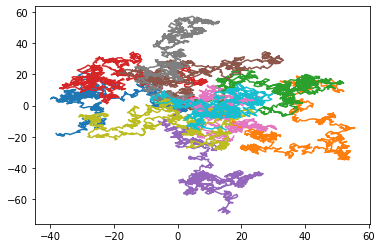

In [6]:
for caminata in listacam:
    plt.plot(caminata[0], caminata[1])
    plt.show
# en el plot por cada elemento de la lista le digo que tome el elemento 0 de la caminata, que es posicion x, y el elemento 1
# que es la posicion y

Vemos ahora a estimar el valor de expectación:
Se lo define (para una caminata) como la distancia del origen al punto de la posicion (Xn, Yn)
La distancia puedo calcularla con pitagoras, para eso debo pasar la lista de las caminatas con numpy

In [9]:
listacamarray = np.array(listacam)

Ahora quiero que cada elemento de los xi, yi se sumen y sacar la raiz cuadrada.
Es decir di = sqrt(xi + yi) y graficar los di las caminatas en un plot de n vs. di (numero de pasos versus distancia al origen).
Esto es, por cada caminata, luego si quiero el valor de expectacion debo sumar las distancias di/10 de todas las caminatas y 
donde 10 es el numero de estas.



In [10]:
x_lista = []
y_lista = []
for i in range (0, 10): 
    x = (listacamarray [i] [0])**2
    y = (listacamarray [i] [1])**2
    x_lista.append(x)
    y_lista.append(y)
# son las posiciones x e y de la primera caminata, el primer corchete [0] se refiere a caminata 1, y el segundo corchete se
# refiere al primer [0] y segundo [1] elemento de la caminata 1
# Los elevo al cuadrado para sacar la distancia usando pitagoras 

In [11]:
len(y_lista [0])

1001

Calculo la distancia de cada caminata

In [15]:
d = []
for i in range (0, 10):
    di =  (x_lista[i] + y_lista [i])**0.5
    d.append(di)

In [108]:
len(d[0])
# Veo cuantos pasos tiene cada caminata

1001

In [13]:
n = []
for i in range (0, 1001):
    n.append(i)
# No me percate que hice el problema con 1001 pasos, porque habia contado la posicion inicial (el origen), como elemento de la 
# lista

Quiero hacer un grafico de numero de pasos (n) vs Distancia

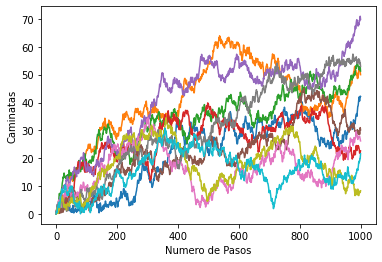

In [16]:
for i in range (0,10):
    plt.plot(n, d[i])
    plt.xlabel ('Numero de Pasos')
    plt.ylabel ('Caminatas')
    plt.show

Calculo el valor de expectacion, es la suma de todos los pasos divido el numero de caminata

In [17]:
E = sum(d)/10

In [18]:
len (E)

1001

Hago un plot del valor de expectacion 

Text(0, 0.5, 'Caminata promedio')

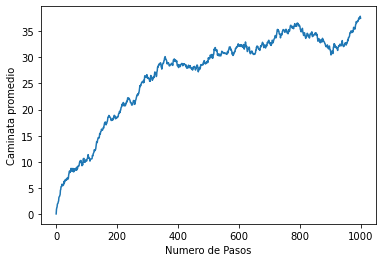

In [20]:
plt.plot (n, E)
plt.xlabel ('Numero de Pasos')
plt.ylabel ('Caminata promedio')

Realizo una lista de valores tomando su raiz entre 0 y 1002, usando la funcion np.arange, que va a tomar el intervalo entre 
0 y 1001**0.5, haciendo la raiz cuadrada de cada valor dentro del intervalo, lo cual nos da el siguiente grafico

In [29]:
a = np.arange(0,1002)**0.5

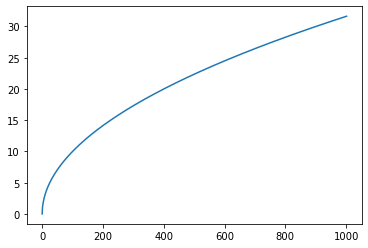

In [30]:
plt.plot(a)

Si superpongo ambos graficos anteriores

Text(0, 0.5, 'Caminata promedio')

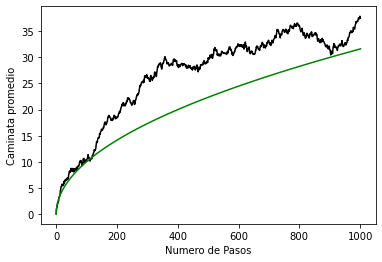

In [31]:
plt.plot (n, E, color = 'k')
plt.plot(a, color = 'g')
plt.xlabel ('Numero de Pasos')
plt.ylabel ('Caminata promedio')

Notemos que el promedio de todas las caminatas de aproxima a N**0.5, por lo tanto, teniendo suficientes caminatas, el valor medio
de estas se aproxima a la raiz cuadrada del numero (N) de pasos.